### Generating team and salaries data
--------------------------------------------------------------------------
To add: description of data/data source

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker
from scipy.stats import linregress


In [ ]:
#Teams data import

teams_df = pd.read_csv("Baseball Dataset\Teams.csv")
                          
teams_df.head()

#Limiting data to years 1985 - 2015
teams_df = teams_df[teams_df['yearID']>=1985].reset_index(drop=True)

teams_df.head()

teams_df.groupby('franchID').count()

#Limiting to franchise in full sample
    #Note: The Arizona Diamondbacks, Colorado Rockies, Flordia Marlins, and Tampa Bay Devils franchises 
    #did not exist during the full study time perion (1985-2015) and are dropped from the dataset

excluded_franchID = ['ARI','COL','FLA','TBD']

teams_df = teams_df.loc[~teams_df['franchID'].isin(excluded_franchID)]

teams_df.groupby('franchID').count()


,yearID,lgID,teamID,divID,Rank,G,Ghome,W,L,DivWin,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
franchID,,,,,,,,,,,,,,,,,,,,,
ANA,31,31,31,31,31,31,31,31,31,30,...,31,31,31,31,31,31,31,31,31,31
ATL,31,31,31,31,31,31,31,31,31,30,...,31,31,31,31,31,31,31,31,31,31
BAL,31,31,31,31,31,31,31,31,31,30,...,31,31,31,31,31,31,31,31,31,31
BOS,31,31,31,31,31,31,31,31,31,30,...,31,31,31,31,31,31,31,31,31,31
CHC,31,31,31,31,31,31,31,31,31,30,...,31,31,31,31,31,31,31,31,31,31
CHW,31,31,31,31,31,31,31,31,31,30,...,31,31,31,31,31,31,31,31,31,31
CIN,31,31,31,31,31,31,31,31,31,30,...,31,31,31,31,31,31,31,31,31,31
CLE,31,31,31,31,31,31,31,31,31,30,...,31,31,31,31,31,31,31,31,31,31
DET,31,31,31,31,31,31,31,31,31,30,...,31,31,31,31,31,31,31,31,31,31


In [3]:
#Salaries data import

salaries_df = pd.read_csv("Baseball Dataset\Salaries.csv")
                          
salaries_df.head()



,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [4]:
#Team player salaries summary statistics
team_salary_stats = salaries_df.groupby(['yearID','teamID']).agg(total_player_salaries = ('salary', 'sum'),
                                                                  med_player_salary = ('salary','median'),
                                                                  min_player_salary = ('salary','min'),
                                                                  max_player_salary = ('salary','max'),
                                                                  salary_var = ('salary','var'))

team_salary_stats.head()

total_player_salaries  med_player_salary  min_player_salary  \
yearID teamID                                                                
1985   ATL                  14807000           620833.5             120000   
       BAL                  11560712           497916.5              60000   
       BOS                  10897560           325000.0             115000   
       CAL                  14427894           493750.0              60000   
       CHA                   9846178           333333.0              60000   

               max_player_salary    salary_var  
yearID teamID                                   
1985   ATL               1625000  1.576369e+11  
       BAL               1472819  1.017152e+11  
       BOS               1075000  8.910658e+10  
       CAL               1100000  9.319582e+10  
       CHA               1242333  1.184021e+11

In [5]:
#Checking # of teams per year
team_salary_stats.groupby('yearID').nunique()

#Consider restricting our sample to original 26 teams


,total_player_salaries,med_player_salary,min_player_salary,max_player_salary,salary_var
yearID,,,,,
1985,26,24,10,23,26
1986,26,25,1,24,26
1987,26,26,2,25,26
1988,26,25,4,23,26
1989,26,26,2,25,26
1990,26,23,1,21,26
1991,26,24,6,24,26
1992,26,24,3,25,26
1993,28,25,3,25,28


In [6]:
#Merging Team and Salary Data
team_salary_df = pd.merge(teams_df, team_salary_stats, on = ('yearID','teamID'))

team_salary_df.head() 

# Export the merged data into a csv
team_salary_df.to_csv("Output/team_salary_merged.csv", index=False)
    

In [7]:
#Adding CBT thresholds and flags for 2003-2015

thresholds = pd.read_csv("Salary Thresholds/2003-2015 Salary Thresholds.csv", thousands=',')

team_salary_2003_2015 = pd.merge(team_salary_df,thresholds, left_on='yearID', right_on='Year')

team_salary_2003_2015['over_threshold'] =np.where(team_salary_2003_2015['total_player_salaries']>team_salary_2003_2015['Threshold'], 1,0)

team_salary_2003_2015['times_over_threshold'] = team_salary_2003_2015.groupby('franchID')['over_threshold'].cumsum()

team_salary_2003_2015.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,teamIDretro,total_player_salaries,med_player_salary,min_player_salary,max_player_salary,salary_var,Year,Threshold,over_threshold,times_over_threshold
0,2003,AL,ANA,ANA,W,3,162,82.0,77,85,...,ANA,79031667,1000000.0,300000,11500000,1.199027e+13,2003,117000000,0,0
1,2003,NL,ATL,ATL,E,1,162,81.0,101,61,...,ATL,106243667,800000.0,300000,14750000,2.563566e+13,2003,117000000,0,0
2,2003,AL,BAL,BAL,E,4,163,81.0,71,91,...,BAL,73877500,1200000.0,300000,13000000,8.226029e+12,2003,117000000,0,0
3,2003,AL,BOS,BOS,E,2,162,81.0,95,67,...,BOS,99946500,2000000.0,300000,20000000,2.294345e+13,2003,117000000,0,0
4,2003,AL,CHA,CHW,C,2,162,81.0,86,76,...,CHA,51010000,475000.0,300000,9000000,7.170776e+12,2003,117000000,0,0


In [8]:
#Dataset info
team_salary_2003_2015.info() 

team_salary_2003_2015.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 57 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yearID                 338 non-null    int64  
 1   lgID                   338 non-null    object 
 2   teamID                 338 non-null    object 
 3   franchID               338 non-null    object 
 4   divID                  338 non-null    object 
 5   Rank                   338 non-null    int64  
 6   G                      338 non-null    int64  
 7   Ghome                  338 non-null    float64
 8   W                      338 non-null    int64  
 9   L                      338 non-null    int64  
 10  DivWin                 338 non-null    object 
 11  WCWin                  338 non-null    object 
 12  LgWin                  338 non-null    object 
 13  WSWin                  338 non-null    object 
 14  R                      338 non-null    int64  
 15  AB    

,yearID,Rank,G,Ghome,W,L,R,AB,H,2B,...,PPF,total_player_salaries,med_player_salary,min_player_salary,max_player_salary,salary_var,Year,Threshold,over_threshold,times_over_threshold
count,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,...,338.000000,3.380000e+02,3.380000e+02,338.000000,3.380000e+02,3.380000e+02,338.000000,3.380000e+02,338.000000,338.000000
mean,2009.000000,2.946746,161.976331,80.997041,81.594675,80.369822,730.026627,5545.044379,1444.571006,287.979290,...,99.553254,9.359137e+07,1.470698e+06,400949.579882,1.506699e+07,1.943478e+13,2009.000000,1.576154e+08,0.050296,0.322485
std,3.747205,1.464761,0.287270,0.425441,11.138922,11.107082,83.394326,79.324042,84.026222,28.810177,...,4.083528,3.933483e+07,9.980763e+05,73249.943947,5.297352e+06,1.508880e+13,3.747205,2.459180e+07,0.218879,1.550198
min,2003.000000,1.000000,161.000000,78.000000,43.000000,57.000000,513.000000,5294.000000,1199.000000,201.000000,...,88.000000,1.789070e+07,3.135000e+05,300000.000000,3.000000e+06,5.713550e+11,2003.000000,1.170000e+08,0.000000,0.000000
25%,2006.000000,2.000000,162.000000,81.000000,73.000000,72.000000,667.000000,5487.000000,1380.000000,270.000000,...,97.000000,6.710537e+07,7.693750e+05,327000.000000,1.150000e+07,8.701190e+12,2006.000000,1.365000e+08,0.000000,0.000000
50%,2009.000000,3.000000,162.000000,81.000000,83.000000,79.000000,724.500000,5543.000000,1443.000000,285.500000,...,100.000000,8.770905e+07,1.197500e+06,400000.000000,1.433866e+07,1.551779e+13,2009.000000,1.620000e+08,0.000000,0.000000
75%,2012.000000,4.000000,162.000000,81.000000,90.000000,89.000000,787.000000,5602.750000,1506.750000,304.750000,...,102.000000,1.123440e+08,2.000000e+06,480000.000000,1.867696e+07,2.397793e+13,2012.000000,1.780000e+08,0.000000,0.000000
max,2015.000000,6.000000,163.000000,84.000000,105.000000,119.000000,968.000000,5769.000000,1667.000000,376.000000,...,115.000000,2.319789e+08,5.833334e+06,514000.000000,3.300000e+07,8.588077e+13,2015.000000,1.890000e+08,1.000000,13.000000


In [9]:
rank_by_salary_df = teams_df.copy(deep=True)
rank_by_salary_df["Salary Rank"] = ""
rank_by_salary_df.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,Salary Rank
0,1985,NL,ATL,ATL,W,5,162,81.0,66,96,...,0.97,Atlanta Braves,Atlanta-Fulton County Stadium,1350137.0,105,106,ATL,ATL,ATL,
1,1985,AL,BAL,BAL,E,4,161,81.0,83,78,...,0.98,Baltimore Orioles,Memorial Stadium,2132387.0,97,97,BAL,BAL,BAL,
2,1985,AL,BOS,BOS,E,5,163,81.0,81,81,...,0.97,Boston Red Sox,Fenway Park II,1786633.0,104,104,BOS,BOS,BOS,
3,1985,AL,CAL,ANA,W,2,162,79.0,90,72,...,0.98,California Angels,Anaheim Stadium,2567427.0,100,100,CAL,CAL,CAL,
4,1985,AL,CHA,CHW,W,3,163,81.0,85,77,...,0.98,Chicago White Sox,Comiskey Park,1669888.0,104,104,CHW,CHA,CHA,


In [10]:
# adding a salary difference column
diff_by_salary_df = team_salary_df.copy(deep=True)
diff_by_salary_df["Salary Rank"] = ""
diff_by_salary_df.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,PPF,teamIDBR,teamIDlahman45,teamIDretro,total_player_salaries,med_player_salary,min_player_salary,max_player_salary,salary_var,Salary Rank
0,1985,NL,ATL,ATL,W,5,162,81.0,66,96,...,106,ATL,ATL,ATL,14807000,620833.5,120000,1625000,1.576369e+11,
1,1985,AL,BAL,BAL,E,4,161,81.0,83,78,...,97,BAL,BAL,BAL,11560712,497916.5,60000,1472819,1.017152e+11,
2,1985,AL,BOS,BOS,E,5,163,81.0,81,81,...,104,BOS,BOS,BOS,10897560,325000.0,115000,1075000,8.910658e+10,
3,1985,AL,CAL,ANA,W,2,162,79.0,90,72,...,100,CAL,CAL,CAL,14427894,493750.0,60000,1100000,9.319582e+10,
4,1985,AL,CHA,CHW,W,3,163,81.0,85,77,...,104,CHW,CHA,CHA,9846178,333333.0,60000,1242333,1.184021e+11,


In [11]:
# group by year and franchID, and calculate the total player salaries for each group
yearly_team_salaries = team_salary_df.groupby(["yearID", "franchID"])["total_player_salaries"].sum().reset_index()

# Rank the total player salaries within each year
yearly_team_salaries['Salary Rank'] = yearly_team_salaries.groupby("yearID")["total_player_salaries"].rank(ascending=False).astype(int)

yearly_team_salaries.head(-30)

yearly_team_salaries[yearly_team_salaries["Salary Rank"]==1]

,yearID,franchID,total_player_salaries,Salary Rank
1,1985,ATL,14807000,1
41,1986,NYY,18494253,1
67,1987,NYY,17099714,1
93,1988,NYY,19441152,1
115,1989,LAD,21071562,1
140,1990,KCR,23361084,1
172,1991,OAK,36999167,1
206,1992,TOR,44788666,1
232,1993,TOR,47279166,1
235,1994,ATL,49383513,1


In [12]:
# Rename the columns
yearly_team_salaries_rename = yearly_team_salaries.rename(columns={'yearID': 'Year', 'franchID': 'Franchise ID', 'total_player_salaries': 'Total Team Salary'})

yearly_team_salaries_rename

,Year,Franchise ID,Total Team Salary,Salary Rank
0,1985,ANA,14427894,2
1,1985,ATL,14807000,1
2,1985,BAL,11560712,6
3,1985,BOS,10897560,10
4,1985,CHC,12702917,4
...,...,...,...,...
801,2015,SFG,164701500,5
802,2015,STL,119241500,10
803,2015,TEX,143742789,7
804,2015,TOR,112992400,15


In [13]:
team_salary_df['Salary Rank'] = team_salary_df.groupby("yearID")["total_player_salaries"].rank(ascending=False).astype(int)

team_salary_df.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,PPF,teamIDBR,teamIDlahman45,teamIDretro,total_player_salaries,med_player_salary,min_player_salary,max_player_salary,salary_var,Salary Rank
0,1985,NL,ATL,ATL,W,5,162,81.0,66,96,...,106,ATL,ATL,ATL,14807000,620833.5,120000,1625000,1.576369e+11,1
1,1985,AL,BAL,BAL,E,4,161,81.0,83,78,...,97,BAL,BAL,BAL,11560712,497916.5,60000,1472819,1.017152e+11,6
2,1985,AL,BOS,BOS,E,5,163,81.0,81,81,...,104,BOS,BOS,BOS,10897560,325000.0,115000,1075000,8.910658e+10,10
3,1985,AL,CAL,ANA,W,2,162,79.0,90,72,...,100,CAL,CAL,CAL,14427894,493750.0,60000,1100000,9.319582e+10,2
4,1985,AL,CHA,CHW,W,3,163,81.0,85,77,...,104,CHW,CHA,CHA,9846178,333333.0,60000,1242333,1.184021e+11,15


In [14]:
#Merging team, salary, and salary rank data

#yearly_team_salaries = yearly_team_salaries.drop(columns='total_player_salaries')

team_salary_df['Salary Rank'] = team_salary_df.groupby("yearID")["total_player_salaries"].rank(ascending=False).astype(int)

#Merging salary thresholds for 2003-2015

thresholds = pd.read_csv("Salary Thresholds/2003-2015 Salary Thresholds.csv", thousands=',')

team_salary_tax_df = pd.merge(team_salary_df,thresholds, left_on='yearID', right_on='Year', how='left').drop(columns=["Year"])

team_salary_tax_df['Threshold'].fillna(0,inplace=True)

#Creating Taxed (over_threshold) Flag for all years
top_5_years = [1997,1998,1999,2002]

team_salary_tax_df['over_threshold'] = np.where(np.logical_xor(np.logical_and(team_salary_tax_df['yearID'].isin(top_5_years), team_salary_tax_df['Salary Rank'] <=5),
                                                               np.logical_and(team_salary_tax_df['yearID'] >=2003, team_salary_tax_df['total_player_salaries']>team_salary_tax_df['Threshold'])),
                                                 1,0)
     #for 1997-2002 top 5 spending teams were taxed
     #for 2003-2015 teams were taxed if spent over threshold


team_salary_tax_df.head()



,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,teamIDlahman45,teamIDretro,total_player_salaries,med_player_salary,min_player_salary,max_player_salary,salary_var,Salary Rank,Threshold,over_threshold
0,1985,NL,ATL,ATL,W,5,162,81.0,66,96,...,ATL,ATL,14807000,620833.5,120000,1625000,1.576369e+11,1,0.0,0
1,1985,AL,BAL,BAL,E,4,161,81.0,83,78,...,BAL,BAL,11560712,497916.5,60000,1472819,1.017152e+11,6,0.0,0
2,1985,AL,BOS,BOS,E,5,163,81.0,81,81,...,BOS,BOS,10897560,325000.0,115000,1075000,8.910658e+10,10,0.0,0
3,1985,AL,CAL,ANA,W,2,162,79.0,90,72,...,CAL,CAL,14427894,493750.0,60000,1100000,9.319582e+10,2,0.0,0
4,1985,AL,CHA,CHW,W,3,163,81.0,85,77,...,CHA,CHA,9846178,333333.0,60000,1242333,1.184021e+11,15,0.0,0


In [15]:
#Counting # of times taxed since 1997
team_salary_tax_df['times_over_threshold'] = team_salary_tax_df.groupby('franchID')['over_threshold'].cumsum()

# Export the merged data into a csv
team_salary_tax_df.to_csv("Output/team_salary_tax.csv", index=False)

#Sorting by most to less taxed teams

df_2015 = team_salary_tax_df[team_salary_tax_df['yearID']==2015]
times_taxed = df_2015[['franchID', 'name', 'times_over_threshold']].sort_values('times_over_threshold', ascending=False)

times_taxed



,franchID,name,times_over_threshold
786,NYY,New York Yankees,17
803,LAD,Los Angeles Dodgers,5
787,BAL,Baltimore Orioles,3
788,BOS,Boston Red Sox,3
789,TEX,Texas Rangers,3
782,CLE,Cleveland Indians,2
801,ATL,Atlanta Braves,2
783,CHW,Chicago White Sox,1
799,NYM,New York Mets,1
780,KCR,Kansas City Royals,0


In [16]:
taxed_df = team_salary_tax_df[team_salary_tax_df['over_threshold']==1]

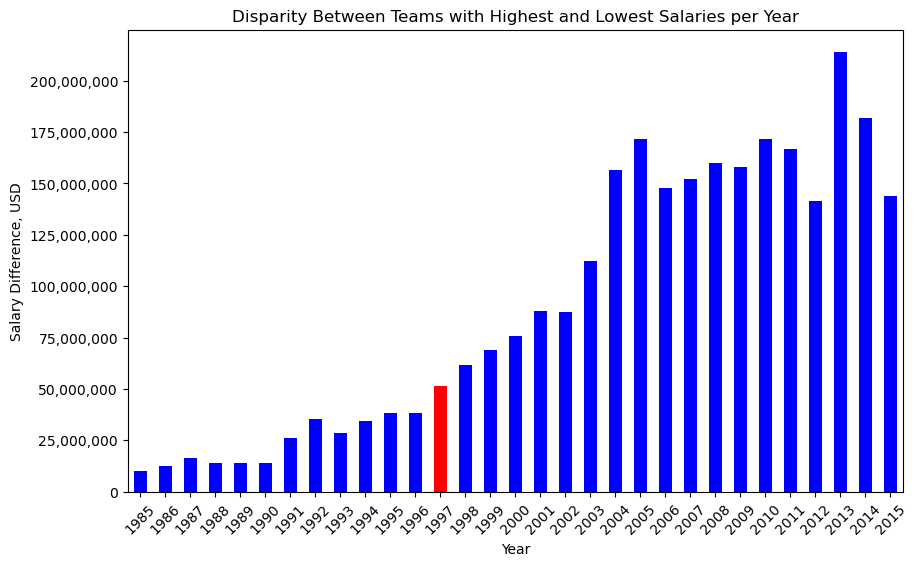

In [20]:
# getting the difference between top and bottom each year
yearly_salary_difference = yearly_team_salaries_rename.groupby("Year")["Total Team Salary"].max() - yearly_team_salaries_rename.groupby("Year")["Total Team Salary"].min()

# getting the average salary per year

avg_salary_per_year = yearly_team_salaries_rename.groupby("Year")["Total Team Salary"].mean()

# bar chart
plt.figure(figsize=(10,6))
bar_colors=["blue" if year != 1997 else "red" for year in yearly_salary_difference.index]
yearly_salary_difference.plot(kind="bar", color=bar_colors)
plt.title("Disparity Between Teams with Highest and Lowest Salaries per Year")
plt.xlabel("Year")
plt.ylabel("Salary Difference, USD")
plt.xticks(rotation=45)
plt.tight_layout
formatter = ticker.StrMethodFormatter('{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)
plt.savefig("Output/Disparity Fig.png")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

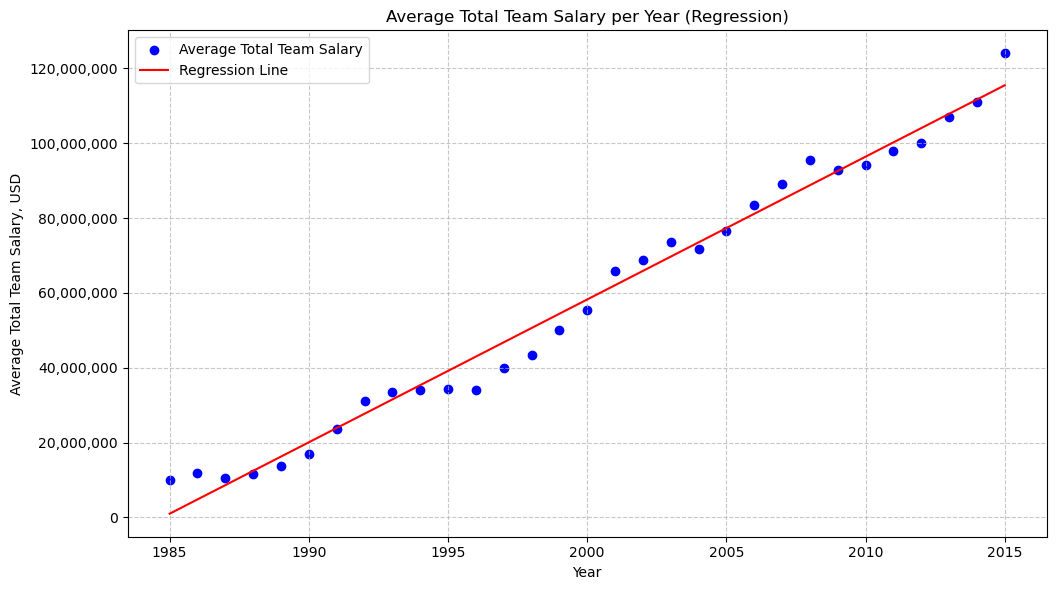

In [23]:
avg_salary_per_year = yearly_team_salaries_rename.groupby("Year")["Total Team Salary"].mean().reset_index()

# Linear regression line
slope, intercept,_,_,_ = linregress(avg_salary_per_year["Year"], avg_salary_per_year["Total Team Salary"])
regression_line = slope * avg_salary_per_year["Year"] + intercept

# Plotting the regression chart
plt.figure(figsize=(10, 6))
plt.scatter(avg_salary_per_year["Year"], avg_salary_per_year["Total Team Salary"], color='blue', label="Average Total Team Salary")
plt.plot(avg_salary_per_year["Year"], regression_line, color="red", linestyle="-", label="Regression Line")
plt.title("Average Total Team Salary per Year (Regression)")
plt.xlabel("Year")
plt.ylabel("Average Total Team Salary, USD")
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.tight_layout()
plt.ticklabel_format(style='plain',axis="y")
formatter = ticker.StrMethodFormatter('{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)
plt.savefig("Output/Avg Regression Fig.png")
plt.show